# Python implementation of Tabu search algorithm for a Travelling Salesman Problem


Assume that the distances between the cities are symmetric (the distance between city
'a' and city 'b' is the same between city 'b' and city 'a').
The TSP can be represented into a graph. The cities are represented by nodes and the
distance between them is represented by the weight of the ark between the nodes.

The .txt file with the graph has the form:

```
node1 node2 distance_between_node1_and_node2
node1 node3 distance_between_node1_and_node3
```

Be careful node1, node2 and the distance between them, must exist only once. This means
in the .txt file should not exist:
```
node1 node2 distance_between_node1_and_node2
node2 node1 distance_between_node2_and_node1
```

Adapted from https://github.com/TheAlgorithms/Python/

In [1]:
import argparse
import copy
import random
import matplotlib.pyplot as plt
import math

In [ ]:
#upload the graph
from google.colab import files
uploaded = files.upload()

Saving city_graph.txt to city_graph.txt


In [ ]:
# check the uploaded file name
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "city_graph.txt" with length 69 bytes


# Generate neighbours
Pure implementation of generating a dictionary of neighbors and the cost with each
neighbor, given a path file that includes a graph.

:param `path`: The path to the .txt file that includes the graph (e.g. city_graph.txt)

:return `dict_of_neighbours`: Dictionary with key each node and value a list of lists with the neighbors of the node and the cost (distance) for each neighbor.

Example of `dict_of_neighbours`:
```
>>dict_of_neighbours['a']
[['b', '20'], ['c', '18'], ['d', '22'], ['e', '26']]
```
This indicates the neighbors of node (city) 'a', which has neighbor the node 'b'
with distance 20, the node 'c' with distance 18, the node 'd' with distance 22 and
the node 'e' with distance 26.

In [2]:
def generate_neighbours(path):
    dict_of_neighbours = {}

    with open(path) as f:
        for line in f:
            if line.split()[0] not in dict_of_neighbours:
                _list = list()
                _list.append([line.split()[1], line.split()[2]])
                dict_of_neighbours[line.split()[0]] = _list
            else:
                dict_of_neighbours[line.split()[0]].append(
                    [line.split()[1], line.split()[2]]
                )
            if line.split()[1] not in dict_of_neighbours:
                _list = list()
                _list.append([line.split()[0], line.split()[2]])
                dict_of_neighbours[line.split()[1]] = _list
            else:
                dict_of_neighbours[line.split()[1]].append(
                    [line.split()[0], line.split()[2]]
                )

    return dict_of_neighbours

In [ ]:
# test
dict_of_neighbours = generate_neighbours("city_graph.txt")
dict_of_neighbours['a']

[['b', '20'], ['c', '18'], ['d', '22'], ['e', '26']]

# Generate first solution
Pure implementation of generating the first solution for the Tabu search to start,
with the redundant resolution strategy. That means that we start from the starting
node (e.g. node 'a'), then we go to the city nearest (lowest distance) to this node
(let's assume is node 'c'), then we go to the nearest city of the node 'c', etc.
till we have visited all cities and return to the starting node.

:param `path`: The path to the .txt file that includes the graph (e.g.city_graph.txt)

:param `dict_of_neighbours`: Dictionary with key each node and value a list of lists
with the neighbors of the node and the cost (distance) for each neighbor.

:return `first_solution`: The solution for the first iteration of Tabu search using
the redundant resolution strategy in a list.

:return `distance_of_first_solution`: The total distance that Travelling Salesman
will travel, if he follows the path in first_solution.

In [3]:
def generate_first_solution(path, dict_of_neighbours):
    with open(path) as f:
        start_node = f.read().split()[0]
    end_node = start_node
    first_solution = []
    visiting = start_node

    distance_of_first_solution = 0
    while visiting not in first_solution:
        minim = 10000
        for k in dict_of_neighbours[visiting]:
            if int(k[1]) < int(minim) and k[0] not in first_solution:
                minim = k[1]
                best_node = k[0]

        first_solution.append(visiting)
        distance_of_first_solution = distance_of_first_solution + int(minim)
        visiting = best_node

    first_solution.append(end_node)

    position = 0
    for k in dict_of_neighbours[first_solution[-2]]:
        if k[0] == start_node:
            break
        position += 1

    distance_of_first_solution = (
        distance_of_first_solution
        + int(dict_of_neighbours[first_solution[-2]][position][1])
        - 10000
    )
    return first_solution, distance_of_first_solution

In [ ]:
first_solution, distance_of_first_solution = generate_first_solution("city_graph.txt",dict_of_neighbours)
print(first_solution)
print(distance_of_first_solution)

['a', 'c', 'b', 'd', 'e', 'a']
105


# Generate neighbours
Pure implementation of generating the neighborhood (sorted by total distance of
each solution from lowest to highest) of a solution with 1-1 exchange method, that
means we exchange each node in a solution with each other node and generating a
number of solution named neighborhood.

:param `solution`: The solution in which we want to find the neighborhood.

:param `dict_of_neighbours`: Dictionary with key each node and value a list of lists with the neighbors of the node and the cost (distance) for each neighbor.

:return `neighborhood_of_solution`: A list that includes the solutions and the total

distance of each solution (in form of list) that are produced with 1-1 exchange
from the solution that the method took as an input

In [4]:
def find_neighborhood(solution, dict_of_neighbours):
    neighborhood_of_solution = []

    for n in solution[1:-1]:
        idx1 = solution.index(n)
        for kn in solution[1:-1]:
            idx2 = solution.index(kn)
            if n == kn:
                continue

            _tmp = copy.deepcopy(solution)
            _tmp[idx1] = kn
            _tmp[idx2] = n

            distance = 0

            for k in _tmp[:-1]:
                next_node = _tmp[_tmp.index(k) + 1]
                for i in dict_of_neighbours[k]:
                    if i[0] == next_node:
                        distance = distance + int(i[1])
            _tmp.append(distance)

            if _tmp not in neighborhood_of_solution:
                neighborhood_of_solution.append(_tmp)

    indexOfLastItemInTheList = len(neighborhood_of_solution[0]) - 1

    neighborhood_of_solution.sort(key=lambda x: x[indexOfLastItemInTheList])
    return neighborhood_of_solution

In [ ]:
print(find_neighborhood(first_solution, dict_of_neighbours))

[['a', 'e', 'b', 'd', 'c', 'a', 90], ['a', 'c', 'd', 'b', 'e', 'a', 90], ['a', 'd', 'b', 'c', 'e', 'a', 93], ['a', 'c', 'b', 'e', 'd', 'a', 102], ['a', 'c', 'e', 'd', 'b', 'a', 113], ['a', 'b', 'c', 'd', 'e', 'a', 119]]


# Tabu search

Pure implementation of Tabu search algorithm for a Travelling Salesman Problem in
Python.

:param `first_solution`: The solution for the first iteration of Tabu search using
the redundant resolution strategy in a list.

:param `distance_of_first_solution`: The total distance that Travelling Salesman will
travel, if he follows the path in first_solution.

:param `dict_of_neighbours`: Dictionary with key each node and value a list of lists
with the neighbors of the node and the cost (distance) for each neighbor.

:param `iters`: The number of iterations that Tabu search will execute.

:param `size`: The size of Tabu List.

:return `best_solution_ever`: The solution with the lowest distance that occurred
during the execution of Tabu search.

:return `best_cost`: The total distance that Travelling Salesman will travel, if he
follows the path in best_solution ever.

In [5]:
def tabu_search(first_solution, distance_of_first_solution, dict_of_neighbours, iters, size):
    count = 1
    solution = first_solution
    tabu_list = list()
    best_cost = distance_of_first_solution
    best_solution_ever = solution

    while count <= iters:
        neighborhood = find_neighborhood(solution, dict_of_neighbours)
        index_of_best_solution = 0
        best_solution = neighborhood[index_of_best_solution]
        best_cost_index = len(best_solution) - 1

        found = False
        while not found and index_of_best_solution < len(neighborhood) - 1:
            i = 0
            while i < len(best_solution):

                if best_solution[i] != solution[i]:
                    first_exchange_node = best_solution[i]
                    second_exchange_node = solution[i]
                    break
                i = i + 1

            if [first_exchange_node, second_exchange_node] not in tabu_list and [second_exchange_node,first_exchange_node] not in tabu_list:
                tabu_list.append([first_exchange_node, second_exchange_node])
                found = True
                solution = best_solution[:-1]
                cost = neighborhood[index_of_best_solution][best_cost_index]
                if cost < best_cost:
                    best_cost = cost
                    best_solution_ever = solution
            else:
                index_of_best_solution = index_of_best_solution + 1
                best_solution = neighborhood[index_of_best_solution]

        if len(tabu_list) >= size:
            tabu_list.pop(0)

        count = count + 1

    return best_solution_ever, best_cost

In [ ]:
    num_iteration = 10
    size_tabu_list = 10

    dict_of_neighbours = generate_neighbours("city_graph.txt")

    first_solution, distance_of_first_solution = generate_first_solution("city_graph.txt", dict_of_neighbours)

    best_sol, best_cost = tabu_search(first_solution,distance_of_first_solution,dict_of_neighbours,num_iteration, size_tabu_list)

    print(f"Best solution: {best_sol}, with total distance: {best_cost}.")

Best solution: ['a', 'd', 'b', 'e', 'c', 'a'], with total distance: 87.


# Test on a randomly generated graph
Generate a new text file `city_graph_random.txt` based on cities sampled on a cartesian grid.

In [6]:
# random.seed(64)
num_cities = 50
x_len = 200
y_len =200
x_coords = [random.randint(0, x_len) for city in range(num_cities)] 
y_coords = [random.randint(0, y_len) for city in range(num_cities)]
!rm -R city_graph_random.txt
f = open("city_graph_random.txt","w+")
for i in range(num_cities-1):
  for j in range(i+1,num_cities):
    city_1 = "c_"+str(x_coords[i]) + "_" + str(y_coords[i])
    city_2 = "c_"+ str(x_coords[j]) + "_" + str(y_coords[j])
    distance = math.sqrt((x_coords[i] - x_coords[j])**2 + (y_coords[i] - y_coords[j])**2)
    f.write("%s %s %d\n" % (city_1,city_2,distance))
f.close()

rm: cannot remove 'city_graph_random.txt': No such file or directory


In [7]:
num_iteration = 200
size_tabu_list = 20

dict_of_neighbours = generate_neighbours("city_graph_random.txt")

first_solution, distance_of_first_solution = generate_first_solution("city_graph_random.txt", dict_of_neighbours)

best_sol, best_cost = tabu_search(first_solution,distance_of_first_solution,dict_of_neighbours,num_iteration, size_tabu_list)

print(f"Best solution: {best_sol}, with total distance: {best_cost}.")

Best solution: ['c_88_11', 'c_77_30', 'c_66_40', 'c_83_49', 'c_89_79', 'c_89_91', 'c_93_117', 'c_108_126', 'c_93_151', 'c_131_156', 'c_139_170', 'c_158_160', 'c_170_176', 'c_184_159', 'c_198_145', 'c_183_113', 'c_173_103', 'c_178_98', 'c_153_78', 'c_148_90', 'c_137_93', 'c_124_75', 'c_111_70', 'c_127_23', 'c_134_17', 'c_140_13', 'c_141_31', 'c_161_21', 'c_194_7', 'c_196_24', 'c_186_60', 'c_153_125', 'c_136_137', 'c_95_196', 'c_62_200', 'c_0_164', 'c_33_135', 'c_66_105', 'c_49_88', 'c_53_85', 'c_54_62', 'c_46_53', 'c_33_46', 'c_24_56', 'c_29_64', 'c_29_67', 'c_11_63', 'c_12_53', 'c_23_32', 'c_24_26', 'c_88_11'], with total distance: 1224.


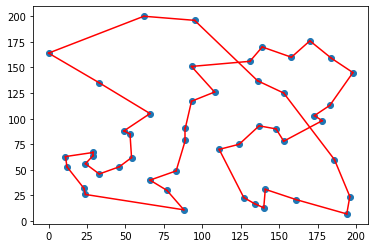

In [18]:
for i in range(len(best_sol)-1):
  plt.plot([int(best_sol[i].split("_")[1]),int(best_sol[i+1].split("_")[1])],[int(best_sol[i].split("_")[2]),int(best_sol[i+1].split("_")[2])],'r')
plt.scatter(x_coords,y_coords)
plt.show()  

In [ ]:
len(best_sol)

37

In [17]:
num_iteration = 100
size_tabu_list = 50
best_sol, best_cost = tabu_search(best_sol,best_cost,dict_of_neighbours,num_iteration, size_tabu_list)